In [39]:
### import all libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [40]:
# read the dataset. Change name of csv file accordingly

df = pd.read_csv('train2.csv')
df.head()

,city_id,ppl_ng,ppl_city,len_sew,len_water,w_person,numbuild,den_pop,ppl_km2,area_city,numconn_buildgen,numconn_livbuild,num_ngconsum,cust_ng_heat,cust_city,ng_MWh
0,1201000,86254,106514,655.3,972.9,22.2,26431,3444,164,649,23312,22235,26101,12093,10199,174048.0
1,1201011,27104,29922,150.9,90.4,31.7,5199,3452,1002,30,5040,4692,9503,4321,9503,70435.0
2,1201022,16368,19872,221.6,248.2,26.4,5621,3401,152,132,5167,4983,4690,2141,0,32035.0
3,1201042,4131,5642,16.5,3.4,3.2,1571,3244,94,60,1278,1227,1154,563,0,5685.5
4,1201052,5572,8139,28.7,167.7,34.7,2453,2823,114,72,1967,1891,1704,883,0,10595.6


In [41]:
# drop city_id and number of people in the city

df = df.drop(['city_id'],axis=1)

In [5]:
# find outlier values 

df[df.ng_MWh>900000]


,ppl_ng,ppl_city,len_sew,len_water,w_person,numbuild,den_pop,ppl_km2,area_city,numconn_buildgen,numconn_livbuild,num_ngconsum,cust_ng_heat,cust_city,ng_MWh
269,537340,771069,1505.7,1477.2,46.4,49890,5324,2359,327,54537,46016,251926,63145,251926,1564331.0
270,537340,771069,1505.7,1477.2,46.4,49890,5324,2359,327,54537,46016,251926,63145,251926,1564331.0


In [5]:
### create a new dataset by dropping outlier values

ef = df[df.ng_MWh<900000].copy()

In [76]:
### drop NG consumption and create new dataset

cf = df.drop('ng_MWh',axis =1)
cf

,ppl_ng,ppl_city,len_sew,len_water,w_person,numbuild,den_pop,ppl_km2,area_city,numconn_buildgen,numconn_livbuild,num_ngconsum,cust_ng_heat,cust_city,kmeans,Cluster
0,86254,106514,655.3,972.9,22.2,26431,3444,164,649,23312,22235,26101,12093,10199,3,0
1,27104,29922,150.9,90.4,31.7,5199,3452,1002,30,5040,4692,9503,4321,9503,0,0
2,16368,19872,221.6,248.2,26.4,5621,3401,152,132,5167,4983,4690,2141,0,0,0
3,4131,5642,16.5,3.4,3.2,1571,3244,94,60,1278,1227,1154,563,0,0,0
4,5572,8139,28.7,167.7,34.7,2453,2823,114,72,1967,1891,1704,883,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,108357,127831,366.9,450.7,35.3,8690,4704,1563,82,8246,7959,41078,4253,41078,3,0
752,133096,173374,374.6,332.6,26.0,10408,4662,2156,80,10304,9816,48736,13881,48736,1,1
753,133096,173374,374.6,332.6,26.0,10408,4662,2156,80,10304,9816,48736,13881,48736,1,1
754,54943,62456,262.5,267.6,30.8,6291,4083,966,65,6178,5896,17947,3863,17947,3,0


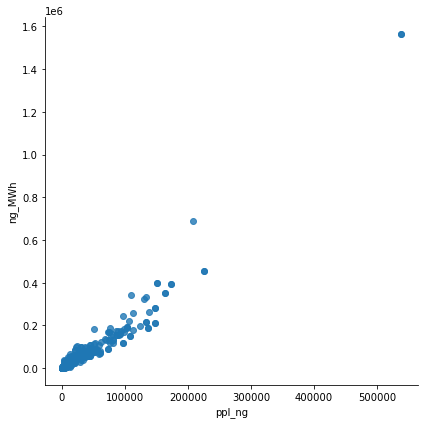

In [7]:
### Plot scatterplot of original dframe with number of NG users vs Consumption of NG

sns.lmplot(x='ppl_ng',y='ng_MWh',data=df, fit_reg=False, palette='inferno',height=6, aspect=1)

In [6]:
### Trial and Error basis, found out that consumotion range of 5 lacs to 6 lacs holds no values 

df[(df.ng_MWh>500000)&(df.ng_MWh<=600000)]

,ppl_ng,ppl_city,len_sew,len_water,w_person,numbuild,den_pop,ppl_km2,area_city,numconn_buildgen,numconn_livbuild,num_ngconsum,cust_ng_heat,cust_city,ng_MWh


In [77]:
### Create Cluster attribute and divide values to their specific ranges 

def convert(ng_val):
    if ng_val > 0.0 and ng_val <= 100000.0:
        return 0
    elif ng_val > 100000.0 and ng_val <= 200000.0:
        return 0
    elif ng_val > 200000.0 and ng_val <= 300000.0:
        return 1
    elif ng_val > 300000.0 and ng_val <= 400000.0:
        return 1
    elif ng_val > 400000.0 and ng_val <= 500000.0:
        return 2
    elif ng_val > 600000.0 and ng_val <= 700000.0:
        return 2
    else:
        return 3

df['Cluster'] = df['ng_MWh'].apply(convert)

ef = df[df.ng_MWh<900000].copy()

cf = df.drop('ng_MWh',axis=1)

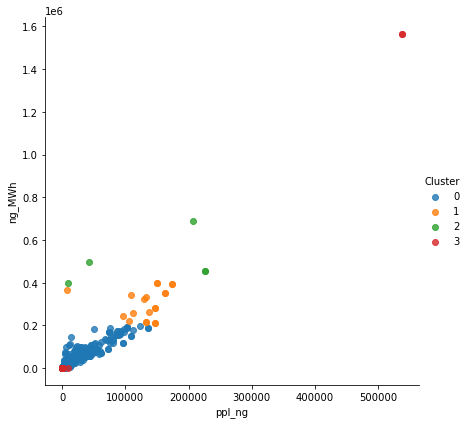

In [78]:
### Plot scatterplot of original dframe with number of NG users vs NG consumption and display the cluster markers

sns.lmplot(x='ppl_ng',y='ng_MWh',data = df, hue='Cluster', 
           fit_reg=False, height = 6, aspect = 1)

In [79]:
### Check for null values

ef.isnull().any()

cf.isnull().any()

ppl_ng              False
ppl_city            False
len_sew             False
len_water           False
w_person            False
numbuild            False
den_pop             False
ppl_km2             False
area_city           False
numconn_buildgen    False
numconn_livbuild    False
num_ngconsum        False
cust_ng_heat        False
cust_city           False
kmeans              False
Cluster             False
dtype: bool

In [80]:
df[df.ppl_city == df.ppl_ng]

,ppl_ng,ppl_city,len_sew,len_water,w_person,numbuild,den_pop,ppl_km2,area_city,numconn_buildgen,numconn_livbuild,num_ngconsum,cust_ng_heat,cust_city,ng_MWh,kmeans,Cluster
137,10650,10650,40.0,21.3,4.4,2523,3720,84,126,900,0,0,10650,0,52000.0,0,0
138,5882,5882,24.0,10.1,4.1,1454,4092,154,38,0,0,0,5882,0,18025.0,0,0
139,4768,4768,16.0,11.2,4.8,1069,3335,54,88,0,0,0,4658,0,14036.0,0,0
140,13170,13170,66.2,97.3,9.0,2869,5964,203,65,0,0,0,12546,0,48647.0,0,0
147,7631,7631,58.4,26.7,10.2,1948,3890,123,62,562,114,7200,7631,0,21056.9,0,0
148,18589,18589,333.2,107.9,27.2,5425,2549,87,212,4569,784,5860,18212,0,78369.4,0,0
149,6809,6809,43.3,24.2,19.4,1962,4096,119,57,7520,742,200,5963,0,12996.0,0,0
150,9341,9341,57.1,20.8,4.1,2333,3097,74,126,201,74,850,8745,0,18452.6,0,0
152,8564,8564,127.2,0.4,0.2,2236,4448,61,141,1420,1000,961,7141,0,16725.9,0,0
204,10279,10279,40.8,1.3,0.1,2755,2580,116,89,7806,4520,8452,0,0,109075.2,0,0


In [70]:
### Create cluster model from original dataframe df

from sklearn.cluster import KMeans 

def doKmeans(df, nclust=4):
    model = KMeans(nclust)
    model.fit(df)
    clust_labels = model.predict(df)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(df,4)
kmeans = pd.DataFrame(clust_labels)
df.kmeans = kmeans


In [71]:
### Metrics Measure of KMeans Labelled Data

from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df.Cluster,df.kmeans))
print('\n')
print(classification_report(df.Cluster,df.kmeans))

df.to_csv('csv_withcluster.csv', index=False)

[[623   0   0  87]
 [  0  20   0   0]
 [  0   5   0   0]
 [ 19   0   2   0]]


              precision    recall  f1-score   support

           0       0.97      0.88      0.92       710
           1       0.80      1.00      0.89        20
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        21

    accuracy                           0.85       756
   macro avg       0.44      0.47      0.45       756
weighted avg       0.93      0.85      0.89       756



In [37]:
df.to_csv('final_train.csv', index=False)

In [21]:
cf

,ppl_ng,len_sew,len_water,w_person,numbuild,den_pop,ppl_km2,area_city,numconn_buildgen,numconn_livbuild,num_ngconsum,cust_ng_heat,cust_city,Cluster,kmeans
0,86254.0,655.3,972.9,22.2,26431.0,3444.0,164.0,649.0,23312.0,22235.0,26101.0,12093.0,10199.0,0,0
1,27104.0,150.9,90.4,31.7,5199.0,3452.0,1002.0,30.0,5040.0,4692.0,9503.0,4321.0,9503.0,0,1
2,16368.0,221.6,248.2,26.4,5621.0,3401.0,152.0,132.0,5167.0,4983.0,4690.0,2141.0,0.0,0,1
3,4131.0,16.5,3.4,3.2,1571.0,3244.0,94.0,60.0,1278.0,1227.0,1154.0,563.0,0.0,0,1
4,5572.0,28.7,167.7,34.7,2453.0,2823.0,114.0,72.0,1967.0,1891.0,1704.0,883.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,108357.0,366.9,450.7,35.3,8690.0,4704.0,1563.0,82.0,8246.0,7959.0,41078.0,4253.0,41078.0,0,0
704,133096.0,374.6,332.6,26.0,10408.0,4662.0,2156.0,80.0,10304.0,9816.0,48736.0,13881.0,48736.0,1,3
705,133096.0,374.6,332.6,26.0,10408.0,4662.0,2156.0,80.0,10304.0,9816.0,48736.0,13881.0,48736.0,1,3
706,54943.0,262.5,267.6,30.8,6291.0,4083.0,966.0,65.0,6178.0,5896.0,17947.0,3863.0,17947.0,0,0


In [75]:
df.to_csv('final_train.csv', index = False)

In [82]:
### Create Cluster Model of Dframe with consumption of NG dropped

clust_labels1, cent1 = doKmeans(cf,4)
kmeans1 = pd.DataFrame(clust_labels1)
cf.kmeans = kmeans1

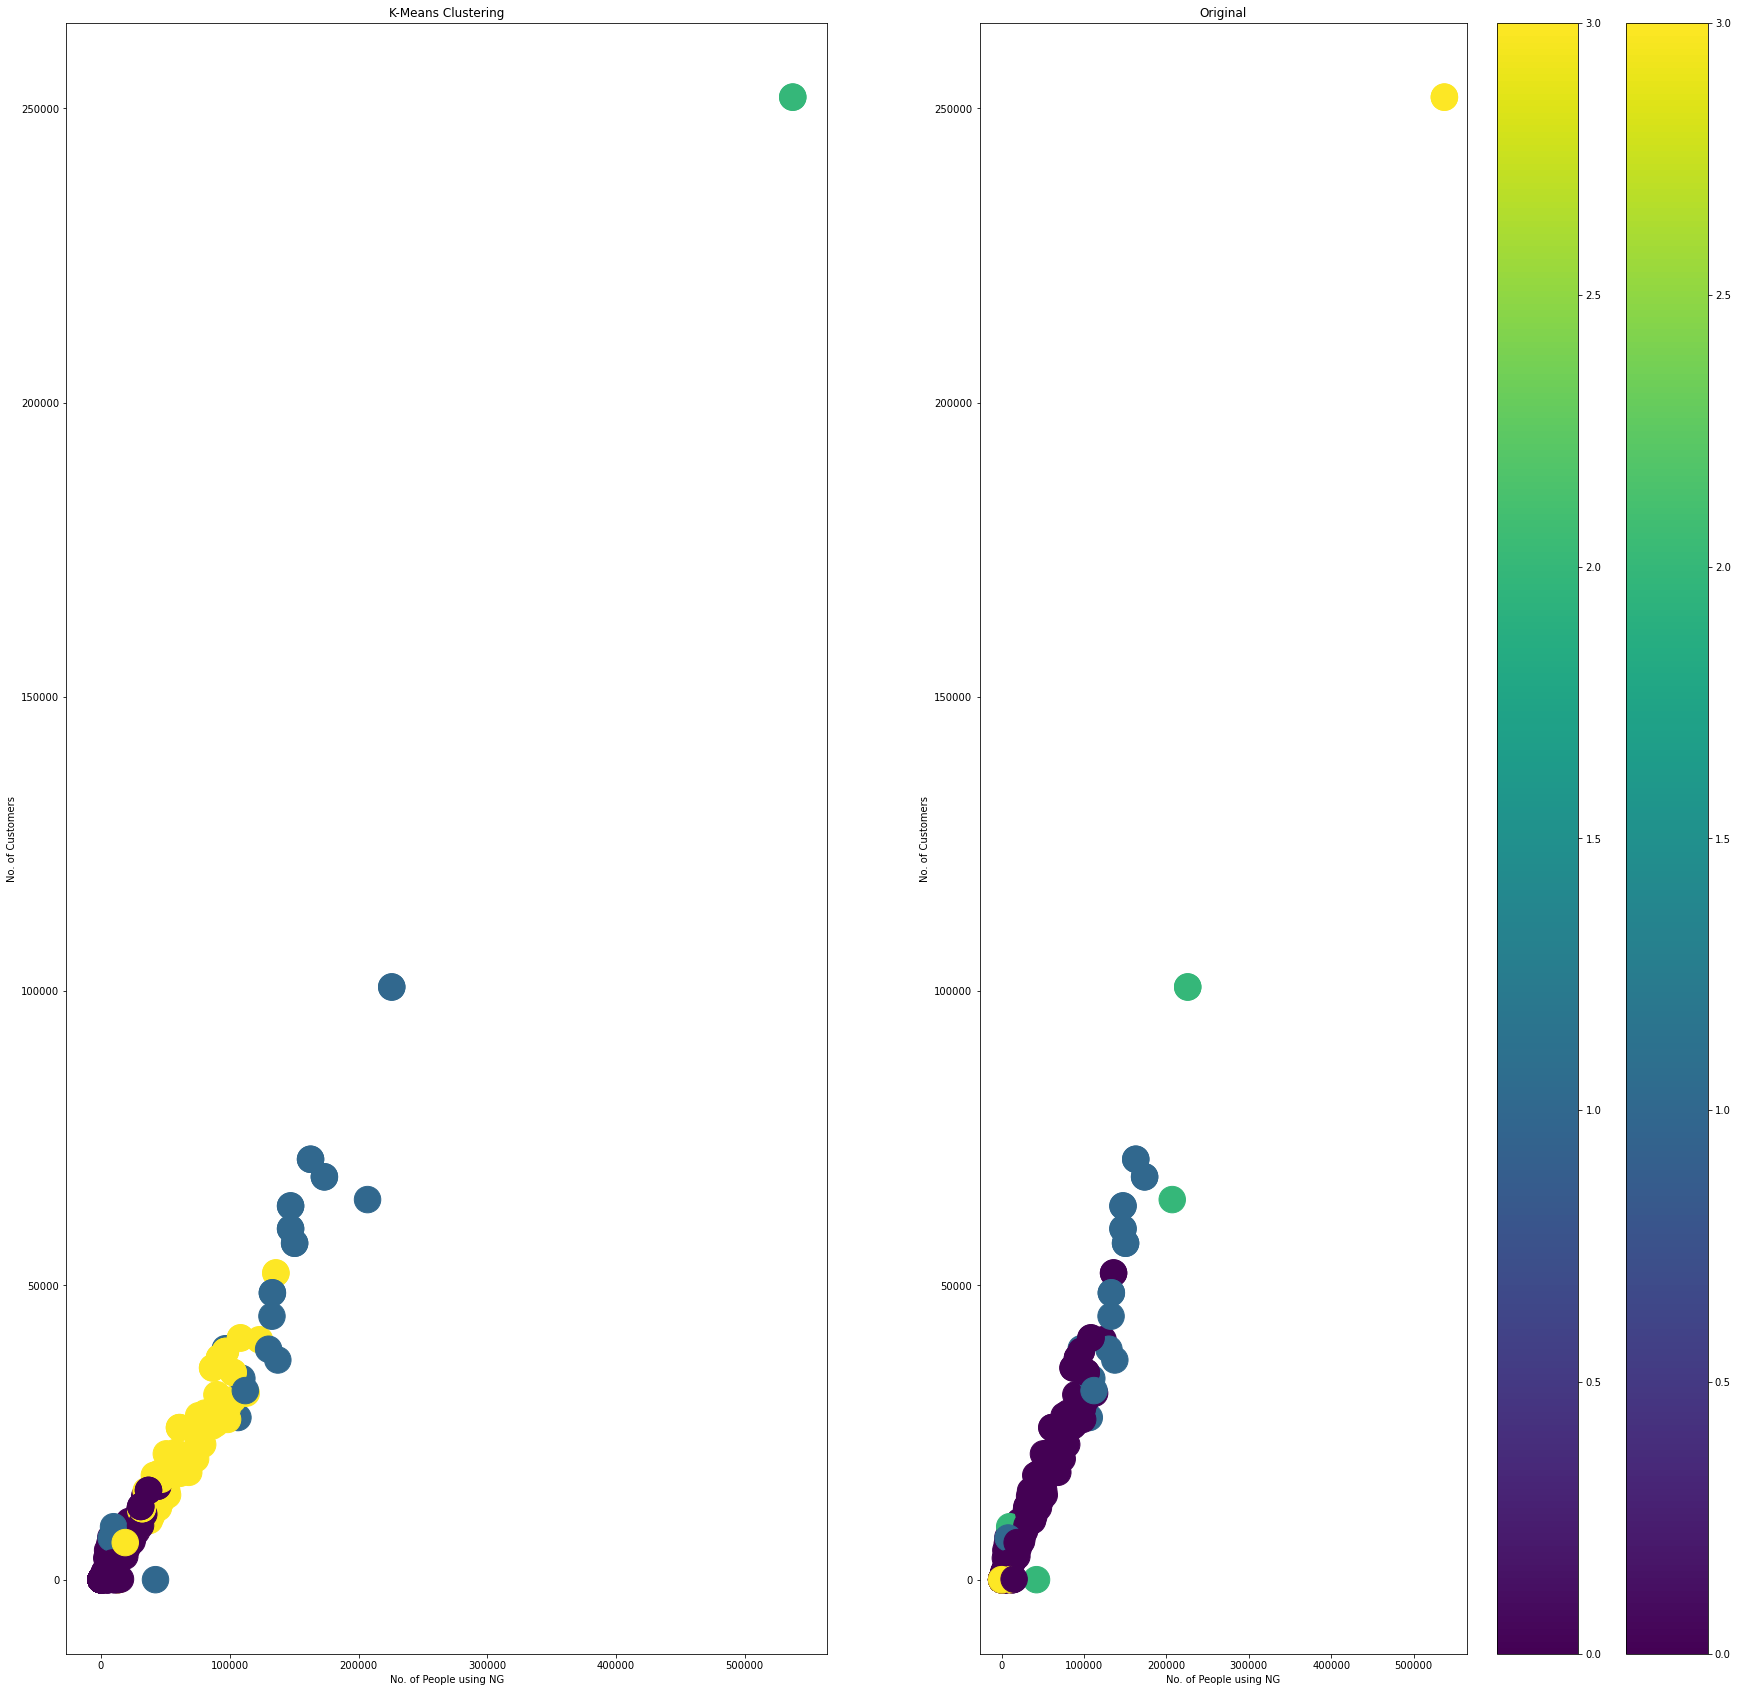

In [83]:
### Compare graphs between KMeans model of modified dataframe and the modified dfram 'cf'

fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(121)
ax2= fig.add_subplot(122)
scatter = ax.scatter(df['ppl_ng'],df['num_ngconsum'],
                     c=kmeans[0],s=700)
ax.set_title('K-Means Clustering')
ax.set_xlabel('No. of People using NG')
ax.set_ylabel('No. of Customers')
plt.colorbar(scatter)

scatter2 = ax2.scatter(df['ppl_ng'],df['num_ngconsum'],
                     c=df.Cluster,s=700)
ax2.set_title('Original')
ax2.set_xlabel('No. of People using NG')
ax2.set_ylabel('No. of Customers')

plt.colorbar(scatter2)

In [86]:
### Metrics Measure of clustered data from modified dframe 'cf'

from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(cf.Cluster,cf.kmeans))
print('\n')
print(classification_report(cf.Cluster,cf.kmeans))

[[621   4   0  85]
 [  1  18   0   1]
 [  2   3   0   0]
 [ 19   0   2   0]]


              precision    recall  f1-score   support

           0       0.97      0.87      0.92       710
           1       0.72      0.90      0.80        20
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        21

    accuracy                           0.85       756
   macro avg       0.42      0.44      0.43       756
weighted avg       0.93      0.85      0.88       756



In [87]:
ef = df[df.ng_MWh<900000].copy()
ef = ef.drop('kmeans',axis = 1)
ef

,ppl_ng,ppl_city,len_sew,len_water,w_person,numbuild,den_pop,ppl_km2,area_city,numconn_buildgen,numconn_livbuild,num_ngconsum,cust_ng_heat,cust_city,ng_MWh,Cluster
0,86254,106514,655.3,972.9,22.2,26431,3444,164,649,23312,22235,26101,12093,10199,174048.0,0
1,27104,29922,150.9,90.4,31.7,5199,3452,1002,30,5040,4692,9503,4321,9503,70435.0,0
2,16368,19872,221.6,248.2,26.4,5621,3401,152,132,5167,4983,4690,2141,0,32035.0,0
3,4131,5642,16.5,3.4,3.2,1571,3244,94,60,1278,1227,1154,563,0,5685.5,0
4,5572,8139,28.7,167.7,34.7,2453,2823,114,72,1967,1891,1704,883,0,10595.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,108357,127831,366.9,450.7,35.3,8690,4704,1563,82,8246,7959,41078,4253,41078,151816.0,0
752,133096,173374,374.6,332.6,26.0,10408,4662,2156,80,10304,9816,48736,13881,48736,214912.0,1
753,133096,173374,374.6,332.6,26.0,10408,4662,2156,80,10304,9816,48736,13881,48736,214912.0,1
754,54943,62456,262.5,267.6,30.8,6291,4083,966,65,6178,5896,17947,3863,17947,85685.8,0


In [54]:
### Create cluster model from dframe 'ef' with no outlier values 

clust_labels2, cent2 = doKmeans(ef,4)
kmeans2 = pd.DataFrame(clust_labels2)
ef.insert(ef.shape[1],'kmeans', kmeans2)

In [55]:
### Drop outliers and Null values in new dframe 'ef'

ef = ef.dropna()
ef.isnull().any()
ef.info()

kmeans2 = kmeans2[:-2]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704 entries, 0 to 705
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ppl_ng            704 non-null    float64
 1   len_sew           704 non-null    float64
 2   len_water         704 non-null    float64
 3   w_person          704 non-null    float64
 4   numbuild          704 non-null    float64
 5   den_pop           704 non-null    float64
 6   ppl_km2           704 non-null    float64
 7   area_city         704 non-null    float64
 8   numconn_buildgen  704 non-null    float64
 9   numconn_livbuild  704 non-null    float64
 10  num_ngconsum      704 non-null    float64
 11  cust_ng_heat      704 non-null    float64
 12  cust_city         704 non-null    float64
 13  ng_MWh            704 non-null    float64
 14  Cluster           704 non-null    int64  
 15  kmeans            704 non-null    float64
dtypes: float64(15), int64(1)
memory usage: 93.5 

In [70]:
df

,ppl_ng,len_sew,len_water,w_person,numbuild,den_pop,ppl_km2,area_city,numconn_buildgen,numconn_livbuild,num_ngconsum,cust_ng_heat,cust_city,ng_MWh,Cluster,kmeans
0,86254.0,655.3,972.9,22.2,26431.0,3444.0,164.0,649.0,23312.0,22235.0,26101.0,12093.0,10199.0,174048.0,0,3
1,27104.0,150.9,90.4,31.7,5199.0,3452.0,1002.0,30.0,5040.0,4692.0,9503.0,4321.0,9503.0,70435.0,0,0
2,16368.0,221.6,248.2,26.4,5621.0,3401.0,152.0,132.0,5167.0,4983.0,4690.0,2141.0,0.0,32035.0,0,0
3,4131.0,16.5,3.4,3.2,1571.0,3244.0,94.0,60.0,1278.0,1227.0,1154.0,563.0,0.0,5685.5,0,0
4,5572.0,28.7,167.7,34.7,2453.0,2823.0,114.0,72.0,1967.0,1891.0,1704.0,883.0,0.0,10595.6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,108357.0,366.9,450.7,35.3,8690.0,4704.0,1563.0,82.0,8246.0,7959.0,41078.0,4253.0,41078.0,151816.0,0,3
704,133096.0,374.6,332.6,26.0,10408.0,4662.0,2156.0,80.0,10304.0,9816.0,48736.0,13881.0,48736.0,214912.0,1,3
705,133096.0,374.6,332.6,26.0,10408.0,4662.0,2156.0,80.0,10304.0,9816.0,48736.0,13881.0,48736.0,214912.0,1,3
706,54943.0,262.5,267.6,30.8,6291.0,4083.0,966.0,65.0,6178.0,5896.0,17947.0,3863.0,17947.0,85685.8,0,3


In [71]:
df

,ppl_ng,len_sew,len_water,w_person,numbuild,den_pop,ppl_km2,area_city,numconn_buildgen,numconn_livbuild,num_ngconsum,cust_ng_heat,cust_city,ng_MWh,Cluster,kmeans
0,86254.0,655.3,972.9,22.2,26431.0,3444.0,164.0,649.0,23312.0,22235.0,26101.0,12093.0,10199.0,174048.0,0,3
1,27104.0,150.9,90.4,31.7,5199.0,3452.0,1002.0,30.0,5040.0,4692.0,9503.0,4321.0,9503.0,70435.0,0,0
2,16368.0,221.6,248.2,26.4,5621.0,3401.0,152.0,132.0,5167.0,4983.0,4690.0,2141.0,0.0,32035.0,0,0
3,4131.0,16.5,3.4,3.2,1571.0,3244.0,94.0,60.0,1278.0,1227.0,1154.0,563.0,0.0,5685.5,0,0
4,5572.0,28.7,167.7,34.7,2453.0,2823.0,114.0,72.0,1967.0,1891.0,1704.0,883.0,0.0,10595.6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,108357.0,366.9,450.7,35.3,8690.0,4704.0,1563.0,82.0,8246.0,7959.0,41078.0,4253.0,41078.0,151816.0,0,3
704,133096.0,374.6,332.6,26.0,10408.0,4662.0,2156.0,80.0,10304.0,9816.0,48736.0,13881.0,48736.0,214912.0,1,3
705,133096.0,374.6,332.6,26.0,10408.0,4662.0,2156.0,80.0,10304.0,9816.0,48736.0,13881.0,48736.0,214912.0,1,3
706,54943.0,262.5,267.6,30.8,6291.0,4083.0,966.0,65.0,6178.0,5896.0,17947.0,3863.0,17947.0,85685.8,0,3


In [109]:
f['kmeans'].value_counts()

0    617
2     68
1     21
3      2
Name: kmeans, dtype: int64

In [110]:
ef = df[df.ng_MWh<900000]

In [127]:
ef.count()

ppl_ng              704
len_sew             704
len_water           704
w_person            704
numbuild            704
den_pop             704
ppl_km2             704
area_city           704
numconn_buildgen    704
numconn_livbuild    704
num_ngconsum        704
cust_ng_heat        704
cust_city           704
ng_MWh              704
Cluster             704
kmeans              704
dtype: int64

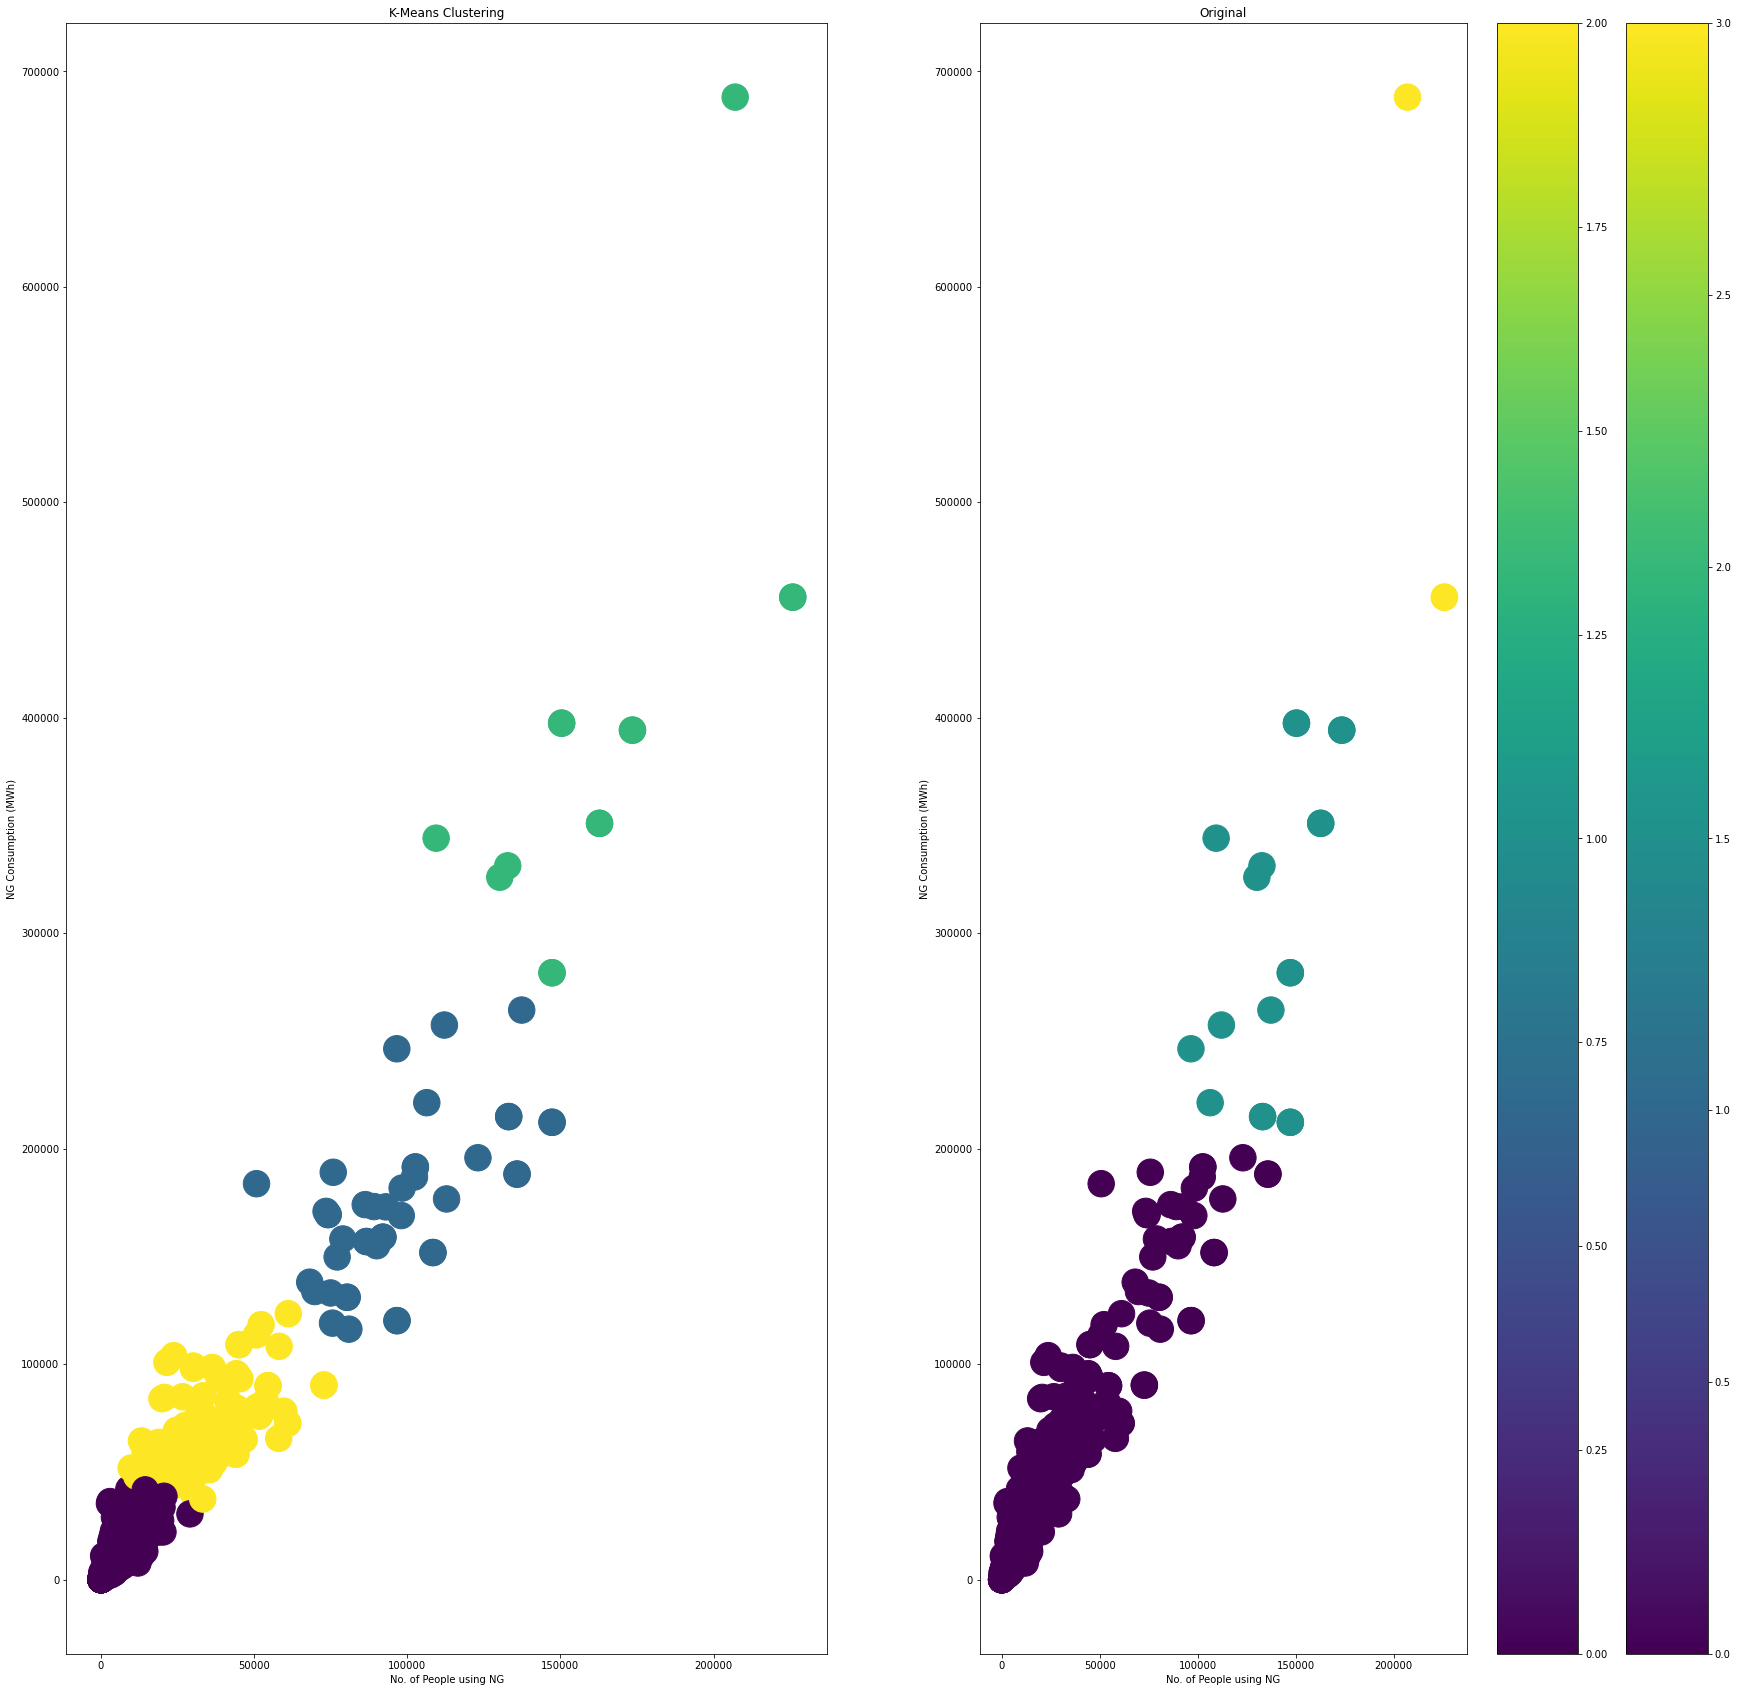

In [56]:
###Compare graphs between KMeans cluster from dframe 'ef' and ef

fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(121)
ax2= fig.add_subplot(122)
scatter = ax.scatter(ef['ppl_ng'],ef['ng_MWh'],
                     c=kmeans2[0],s=700)
ax.set_title('K-Means Clustering')
ax.set_xlabel('No. of People using NG')
ax.set_ylabel('NG Consumption (MWh)')
plt.colorbar(scatter)

scatter2 = ax2.scatter(ef['ppl_ng'],ef['ng_MWh'],
                     c=ef.Cluster,s=700)
ax2.set_title('Original')
ax2.set_xlabel('No. of People using NG')
ax2.set_ylabel('NG Consumption (MWh)')

plt.colorbar(scatter2)

In [57]:
### Metrics Measure of cluster model from dframe 'ef'

from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(ef.Cluster,ef.kmeans))
print('\n')
print(classification_report(ef.Cluster,ef.kmeans))

[[552  35  12  83]
 [  2   6   1  10]
 [  0   0   1   2]
 [  0   0   0   0]]


              precision    recall  f1-score   support

         0.0       1.00      0.81      0.89       682
         1.0       0.15      0.32      0.20        19
         2.0       0.07      0.33      0.12         3
         3.0       0.00      0.00      0.00         0

    accuracy                           0.79       704
   macro avg       0.30      0.36      0.30       704
weighted avg       0.97      0.79      0.87       704



/home/ranga/anaconda3/envs/snake3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
### Note: It appears when number of clusters increases beyond a certain limit, KMeans is unable to label some data and directly allots it '0'.
###       This '0' allocation decreases the accuracy of the model. Also there is disparity in dispersion of data with over 90% of data in the range of 
###       1 lacs to 2 lacs. More data will be needed. 